In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
n = 100
L_f = 1

In [3]:
# Objective function.
def f(x):
    x = np.array(x)
    s = np.sum((x[:-1] - x[1:])**2)
    return (L_f / 8) * (x[0]**2 + s + x[-1]**2) - (L_f / 4) * x[0]

# Exact Gradient of the objective function
def grad_f(x):
    df_x1 = (L_f / 4)*(2 * x[0] - x[1] - 1) 
    df_xi = [(L_f / 4) * (-x[i - 1] + 2 * x[i] - x[i + 1]) for i in range(1, n - 1)]
    df_xn = (L_f / 4) * (2 * x[-1] - x[n-2])
    return np.array([df_x1] + df_xi + [df_xn]) 

f_star = (-n * L_f) / (8 * (n + 1))
x_star = np.array([1 - ((i + 1) / (n + 1))  for i in range(n)])

In [4]:
# Relative noisy gradient
def noisy_gradf(x, eps):
    exact_grad = grad_f(x)
    return np.multiply(1-eps, exact_grad)

In [5]:
# ISTM
def Noise_Sim_Tri_Method(init_point, K,  Lip_cons, a, eps, p):
    fxk_Sim_Tri_Method = [f(init_point)]
    R0_squre = np.linalg.norm(x0 - x_star)**2   
    e_0 = (4 * a * L_f * R0_squre)
    Estimates = [e_0]    
    y = init_point
    z = init_point
    alpha =  0   
    A = alpha          
    k = 0
    while(True):
        alpha = (k + 2)**(p - 1) / (2 * a * Lip_cons)                      
        A1 = A + alpha                                                 
        x1 = np.divide(np.multiply(alpha, z) + np.multiply(A, y) , A1 )
        z1 = np.subtract(z, np.multiply(alpha , noisy_gradf(x1, eps))) 
        y1 = np.divide(np.multiply(alpha, z1) + np.multiply(A, y) , A1)          
        y = y1
        z = z1
        A = A1                   
        fxk_Sim_Tri_Method.append(f(y1))      
        k += 1          
        if not( k < K):
            break        
        Estimate_k = 4 * a * L_f * R0_squre/((k + 1)**p)
        Estimates.append(Estimate_k)
    return fxk_Sim_Tri_Method, Estimates

In [6]:
x0 = np.array([0.5]*n)
K = 20000
a = 30

In [8]:
res_nonexact_STM_2   = Noise_Sim_Tri_Method(init_point=x0, K=K, Lip_cons=L_f, a=a, eps = 0.5, p = 2)
res_nonexact_STM_1_7 = Noise_Sim_Tri_Method(init_point=x0, K=K, Lip_cons=L_f, a=a, eps = 0.7, p = 2)
res_nonexact_STM_1_5 = Noise_Sim_Tri_Method(init_point=x0, K=K, Lip_cons=L_f, a=a, eps = 0.9, p = 2)
res_nonexact_STM_1_3 = Noise_Sim_Tri_Method(init_point=x0, K=K, Lip_cons=L_f, a=a, eps = 0.99, p = 2)

In [9]:
y_STM_2   = [(value_f - f_star) for value_f in res_nonexact_STM_2[0] ]    # eps = 0.5
y_STM_1_7 = [(value_f - f_star) for value_f in res_nonexact_STM_1_7[0] ]  # eps = 0.7
y_STM_1_5 = [(value_f - f_star) for value_f in res_nonexact_STM_1_5[0] ]  # eps = 0.9
y_STM_1_3 = [(value_f - f_star) for value_f in res_nonexact_STM_1_3[0] ]  # eps = 0.99

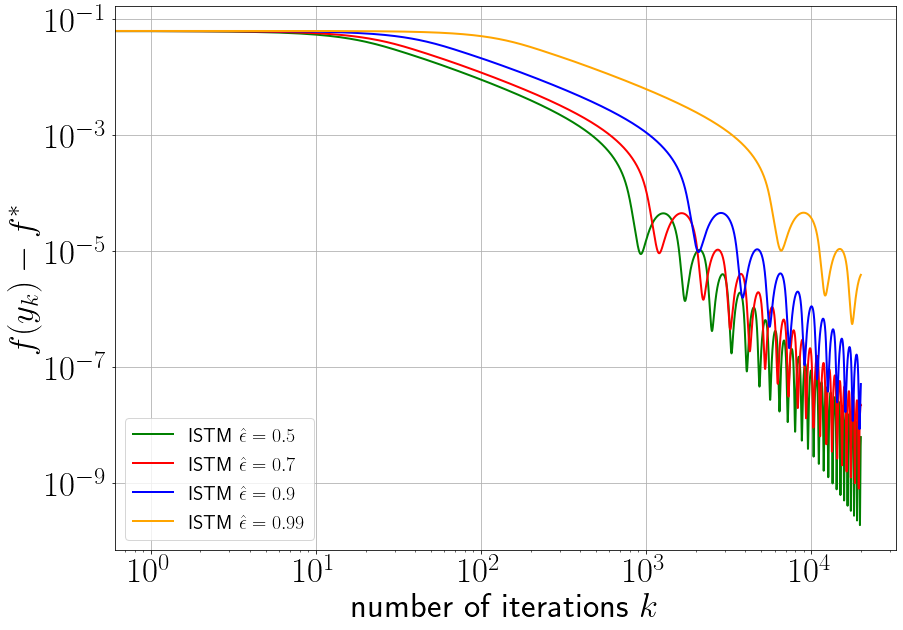

In [10]:
plt.rc('text', usetex=True)
plt.figure(figsize=(14, 10))
fontsize=20

plt.plot(range(len(y_STM_2))  , y_STM_2  , linewidth=2,  label = 'ISTM $\hat{\epsilon}=0.5$', color ='g')
plt.plot(range(len(y_STM_1_7)), y_STM_1_7, linewidth=2,  label = 'ISTM $\hat{\epsilon}=0.7$', color ='r')
plt.plot(range(len(y_STM_1_5)), y_STM_1_5, linewidth=2,  label = 'ISTM $\hat{\epsilon}=0.9$', color ='blue')
plt.plot(range(len(y_STM_1_3)), y_STM_1_3, linewidth=2,  label = 'ISTM $\hat{\epsilon}=0.99$', color ='orange')


plt.grid(True)
plt.xlabel('number of iterations $k$', fontsize = 35)
plt.ylabel('$f(y_k)-f^{*}$', fontsize = 35)
plt.xticks(fontsize = 35)
_ = plt.yticks(fontsize = 35)

#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=fontsize )
plt.legend(fontsize=fontsize)

#plt.title('relative error, $\hat{\epsilon}=0.9$' , fontsize=fontsize)
plt.yscale('log')
plt.xscale('log')
#plt.savefig('values_f_ISTM_a_30.pdf')
plt.show()